In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os

os.chdir("/content/drive/MyDrive/smart-cart")

#Download the dataset

In [ ]:
!wget https://assets.supervisely.com/supervisely-supervisely-assets-public/teams_storage/6/O/RW/i7P4yZ7P2E4m2DuJBjHqxgl0AjZco5gwVzNUlADpFpfWgCHbzZVB94J2BGCNqFfh24xJVGgmmKIJsIdmWNbWIfgl0AzVishMvnpZ2UncKiIVqjA1isd4mV9QnHSh.tar

--2025-03-08 21:45:55--  https://assets.supervisely.com/supervisely-supervisely-assets-public/teams_storage/6/O/RW/i7P4yZ7P2E4m2DuJBjHqxgl0AjZco5gwVzNUlADpFpfWgCHbzZVB94J2BGCNqFfh24xJVGgmmKIJsIdmWNbWIfgl0AzVishMvnpZ2UncKiIVqjA1isd4mV9QnHSh.tar
Resolving assets.supervisely.com (assets.supervisely.com)... 94.46.171.158
Connecting to assets.supervisely.com (assets.supervisely.com)|94.46.171.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 667002880 (636M) [application/x-tar]
Saving to: ‘i7P4yZ7P2E4m2DuJBjHqxgl0AjZco5gwVzNUlADpFpfWgCHbzZVB94J2BGCNqFfh24xJVGgmmKIJsIdmWNbWIfgl0AzVishMvnpZ2UncKiIVqjA1isd4mV9QnHSh.tar’

i7P4yZ7P2E4m2DuJBjH 100%[===================>] 636.10M  31.2MB/s    in 23s     

2025-03-08 21:46:19 (27.3 MB/s) - ‘i7P4yZ7P2E4m2DuJBjHqxgl0AjZco5gwVzNUlADpFpfWgCHbzZVB94J2BGCNqFfh24xJVGgmmKIJsIdmWNbWIfgl0AzVishMvnpZ2UncKiIVqjA1isd4mV9QnHSh.tar’ saved [667002880/667002880]



In [ ]:
!tar -xvf i7P4yZ7P2E4m2DuJBjHqxgl0AjZco5gwVzNUlADpFpfWgCHbzZVB94J2BGCNqFfh24xJVGgmmKIJsIdmWNbWIfgl0AzVishMvnpZ2UncKiIVqjA1isd4mV9QnHSh.tar -C dataset/

tar: Removing leading `/' from member names
/
LICENSE.md
README.md
augmented/
augmented/ann/
augmented/ann/D2S_99000004_D2S_augmented.jpg.json
augmented/ann/D2S_99000019_D2S_augmented.jpg.json
augmented/ann/D2S_99000052_D2S_augmented.jpg.json
augmented/ann/D2S_99000075_D2S_augmented.jpg.json
augmented/ann/D2S_99000117_D2S_augmented.jpg.json
augmented/ann/D2S_99000185_D2S_augmented.jpg.json
augmented/ann/D2S_99000192_D2S_augmented.jpg.json
augmented/ann/D2S_99000219_D2S_augmented.jpg.json
augmented/ann/D2S_99000241_D2S_augmented.jpg.json
augmented/ann/D2S_99000296_D2S_augmented.jpg.json
augmented/ann/D2S_99000306_D2S_augmented.jpg.json
augmented/ann/D2S_99000377_D2S_augmented.jpg.json
augmented/ann/D2S_99000385_D2S_augmented.jpg.json
augmented/ann/D2S_99000393_D2S_augmented.jpg.json
augmented/ann/D2S_99000409_D2S_augmented.jpg.json
augmented/ann/D2S_99000437_D2S_augmented.jpg.json
augmented/ann/D2S_99000448_D2S_augmented.jpg.json
augmented/ann/D2S_99000531_D2S_augmented.jpg.json
augment

In [ ]:
!ls ./dataset/

augmented  LICENSE.md  meta.json  README.md  test  training  validation


# Data exploration

## Instance Categories

In [ ]:
import json

In [ ]:
metadata_path = "./dataset/meta.json"

with open(metadata_path, "r") as f:
  metadata = json.load(f)
metadata.keys()

dict_keys(['classes', 'tags', 'projectType'])

In [ ]:
print("Number of object categories",len(metadata["classes"]))
print("Attributes of a class",metadata["classes"][0].keys())


Number of object categories 60
Attributes of a class dict_keys(['title', 'shape', 'color', 'geometry_config', 'id', 'hotkey'])


In [ ]:
print("List of object categories:\n",*list(map(lambda instance: instance["title"],metadata["classes"])),sep="\n")

List of object categories:

adelholzener_alpenquelle_classic_075
adelholzener_alpenquelle_naturell_075
adelholzener_classic_bio_apfelschorle_02
adelholzener_classic_naturell_02
adelholzener_gourmet_mineralwasser_02
apple_braeburn_bundle
apple_golden_delicious
apple_granny_smith
apple_red_boskoop
augustiner_lagerbraeu_hell_05
augustiner_weissbier_05
avocado
banana_bundle
banana_single
cafe_wunderbar_espresso
caona_cocoa
carrot
clementine
clementine_single
coca_cola_05
coca_cola_light_05
cocoba_cocoa
corn_salad
corny_nussvoll
corny_nussvoll_single
corny_schoko_banane
corny_schoko_banane_single
cucumber
douwe_egberts_professional_ground_coffee
dr_oetker_vitalis_knuspermuesli_klassisch
ethiquable_gruener_tee_ceylon
franken_tafelreiniger
gepa_bio_caffe_crema
gepa_bio_und_fair_fencheltee
gepa_bio_und_fair_kamillentee
gepa_bio_und_fair_kraeuterteemischung
gepa_bio_und_fair_pfefferminztee
gepa_bio_und_fair_rooibostee
gepa_italienischer_bio_espresso
grapes_green_sugraone_seedless
grapes_sweet_c

In [ ]:
# Check whether all images have the same size
# accross all sets
train_path = "./dataset/training/ann"
val_path = "./dataset/validation/ann"
test_path = "./dataset/test/ann"
aug_path = "./dataset/augmented/ann"

## Class Sizes

In [ ]:
def check_image_size_variability(shapes):
  return all([shape == shapes[0] for shape in shapes[1:]])

def get_shapes(ann_path):
  shapes = []
  for root, subdirs, filenames in os.walk(ann_path):

    for filename in filenames:

      abs_path = os.path.join(root, filename)

      with open(abs_path, "r") as f:
        metadata = json.load(f)

      shapes.append((metadata['size']['height'],
                     metadata['size']['width']
                     ))
  return shapes

In [ ]:
train_shapes = get_shapes(train_path)
aug_shapes = get_shapes(aug_path)
val_shapes = get_shapes(val_path)
test_shapes = get_shapes(test_path)

In [ ]:
check_image_size_variability(train_shapes),check_image_size_variability(aug_shapes),check_image_size_variability(val_shapes),check_image_size_variability(test_shapes)

(True, True, True, True)

In [ ]:
dataset_shapes = [*train_shapes,*aug_shapes,*val_shapes,*test_shapes]
check_image_size_variability(dataset_shapes)

True

In [ ]:
train_shapes[0]

(1440, 1920)

All images in the dataset have the same shape of 1920*1440

In [ ]:
print(f"Total images used in training: {len(train_shapes)+len(aug_shapes)}")
print(f"Total images used in validation: {len(val_shapes)}")
print(f"Total images used in testing: {len(test_shapes)}")

Total images used in training: 420
Total images used in validation: 163
Total images used in testing: 445


## Class Balance

In [ ]:
# Verify that each class is present in the training
class_ids = list(map(lambda x: x["id"],metadata["classes"]))
class_ids[-1]

28369

In [ ]:
# Get classes present in each set
def get_all_instances_values_by_key(key, ann):

  values = []

  for obj in ann["objects"]:
    value = obj[key]
    assert not isinstance(value,list) , f"This method doesn't support values of type list"

    values.append(value)

  return values


In [ ]:
train_class_ids = []
for annotatio_path in os.listdir(train_path):

  abs_path = os.path.join(train_path, annotatio_path)

  with open(abs_path, "r") as f:
    image_meta = json.load(f)

  train_class_ids.extend(get_all_instances_values_by_key("classId", image_meta))

train_class_ids = set(train_class_ids)

len(train_class_ids) == len(metadata["classes"]), len(train_class_ids) , len(metadata["classes"])

(False, 34, 60)

In [ ]:
val_class_ids = []
for annotatio_path in os.listdir(val_path):

  abs_path = os.path.join(val_path, annotatio_path)

  with open(abs_path, "r") as f:
    image_meta = json.load(f)

  val_class_ids.extend(get_all_instances_values_by_key("classId", image_meta))

val_class_ids = set(val_class_ids)

len(val_class_ids) == len(metadata["classes"]), len(val_class_ids) , len(metadata["classes"])

(True, 60, 60)

In [ ]:
aug_class_ids = []
for annotatio_path in os.listdir(aug_path):

  abs_path = os.path.join(aug_path, annotatio_path)

  with open(abs_path, "r") as f:
    image_meta = json.load(f)

  aug_class_ids.extend(get_all_instances_values_by_key("classId", image_meta))

aug_class_ids = set(aug_class_ids)

len(aug_class_ids) == len(metadata["classes"]), len(aug_class_ids) , len(metadata["classes"])

(True, 60, 60)

In [ ]:
test_class_ids = []
for annotatio_path in os.listdir(test_path):

  abs_path = os.path.join(test_path, annotatio_path)

  with open(abs_path, "r") as f:
    image_meta = json.load(f)

  test_class_ids.extend(get_all_instances_values_by_key("classId", image_meta))

test_class_ids = set(test_class_ids)

len(test_class_ids) == len(metadata["classes"]), len(test_class_ids) , len(metadata["classes"])

(False, 0, 60)

In [ ]:
train_class_ids == val_class_ids , train_class_ids == aug_class_ids, train_class_ids ==test_class_ids

(False, False, False)

In [ ]:
aug_class_ids.intersection(train_class_ids) == train_class_ids

True

In [ ]:
metadata_path = "./dataset/meta.json"

with open(metadata_path, "r") as f:
  metadata = json.load(f)

orig_class_ids = list(map(lambda meta: meta["id"], metadata["classes"]))
classId_idx = {class_meta["id"]: idx for idx, class_meta in enumerate(metadata["classes"])}

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.patches import Polygon
import numpy as np

def read_annotation(ann_path):

  with open(ann_path, "r") as f:
    annotation = json.load(f)

  return annotation

def get_instance_count_per_class(src):

  class_count = defaultdict(int)

  for root, _, filenames in os.walk(src):
    for filename in filenames:

      ann = read_annotation(os.path.join(root, filename))

      for obj in ann["objects"]:
        id = classId_idx[obj["classId"]]
        class_count[id] += 1
  return class_count

def polygon_area(polygon):

    # compute polygon area using showlace formula
    verts = polygon.get_xy()  # Get polygon vertices (including closing point)
    x, y = verts[:, 0], verts[:, 1]

    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

def get_avg_instance_area_per_class(src):

  class_area = defaultdict(list)

  for root, _, filenames in os.walk(src):
    for filename in filenames:

      ann = read_annotation(os.path.join(root, filename))

      for obj in ann["objects"]:
        points = obj["points"]["exterior"]
        polygon = Polygon([*points])
        class_id = classId_idx[obj["classId"]]

        image_area = ann["size"]["height"]*ann["size"]["width"]
        area = polygon_area(polygon)
        area_per_pixel = area/image_area
        class_area[class_id].append(area_per_pixel)

  class_area = {k:np.mean(v) for k,v in class_area.items()}

  return class_area




def plot_histogram(data, title):

  plt.figure(figsize=(15,6))
  x,y = data
  sns.barplot(x=x, y=y, palette="viridis")
  plt.title(title)
  plt.show()




<ipython-input-41-61224dff7284>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="viridis")


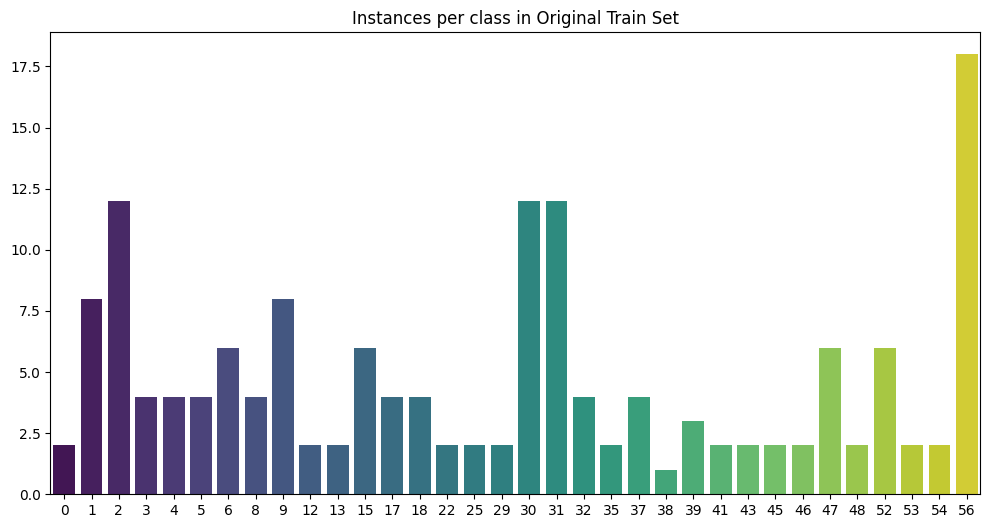

In [ ]:
train_path = "./dataset/training/ann"
val_path = "./dataset/validation/ann"
test_path = "./dataset/test/ann"
aug_path = "./dataset/augmented/ann"

instance_count_per_class = get_instance_count_per_class(train_path)
avg_instance_area_per_class = get_avg_instance_area_per_class(train_path)
plot_histogram((instance_count_per_class.keys(), instance_count_per_class.values()), "Instances per class in Original Train Set")

<ipython-input-41-61224dff7284>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="viridis")


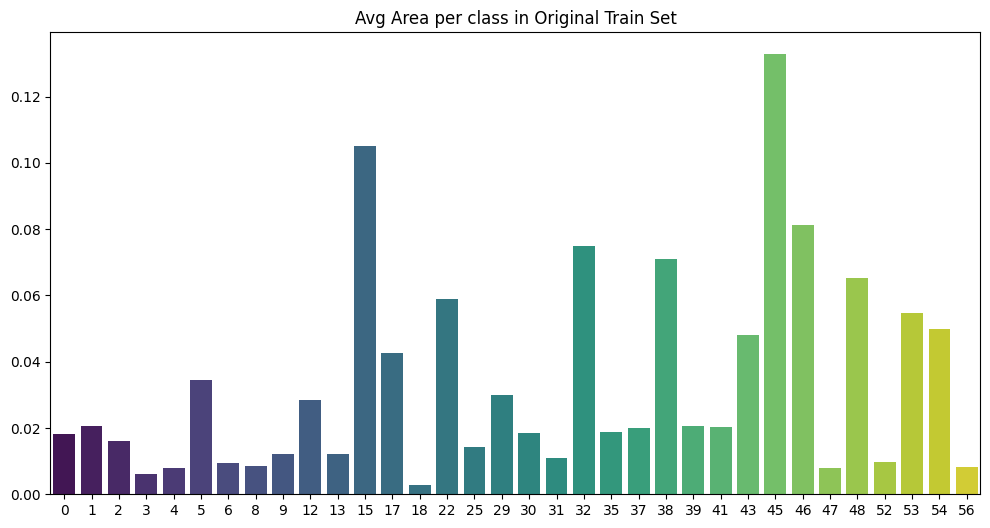

In [ ]:
plot_histogram((instance_count_per_class.keys(), avg_instance_area_per_class.values()), "Avg Area per class in Original Train Set")

<ipython-input-45-6c17ed8da948>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="viridis")


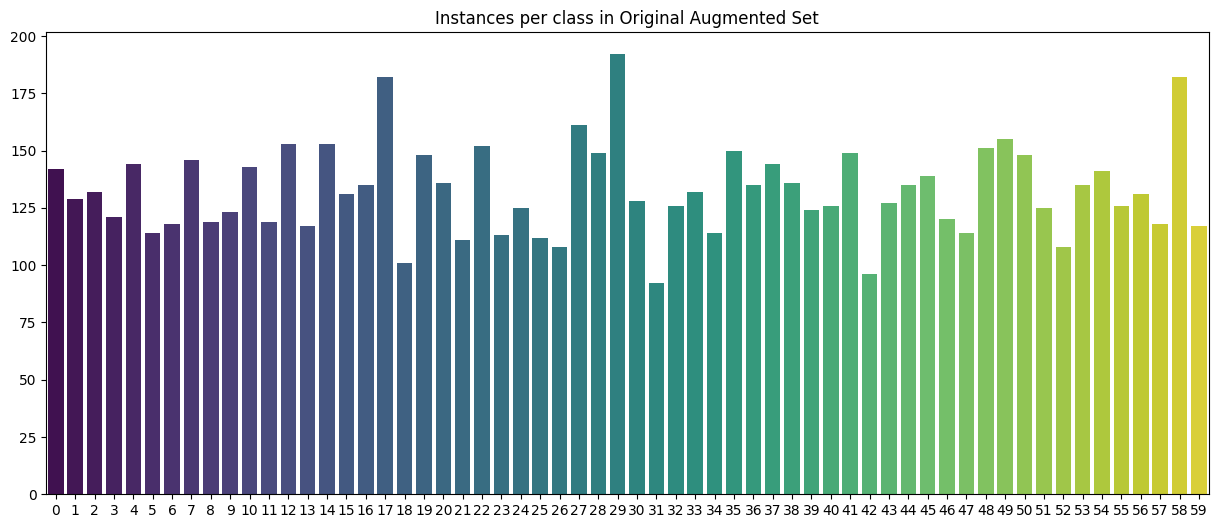

In [ ]:
instance_count_per_class = get_instance_count_per_class(aug_path)
avg_instance_area_per_class = get_avg_instance_area_per_class(aug_path)
plot_histogram((instance_count_per_class.keys(), instance_count_per_class.values()), "Instances per class in Original Augmented Set")

<ipython-input-45-6c17ed8da948>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="viridis")


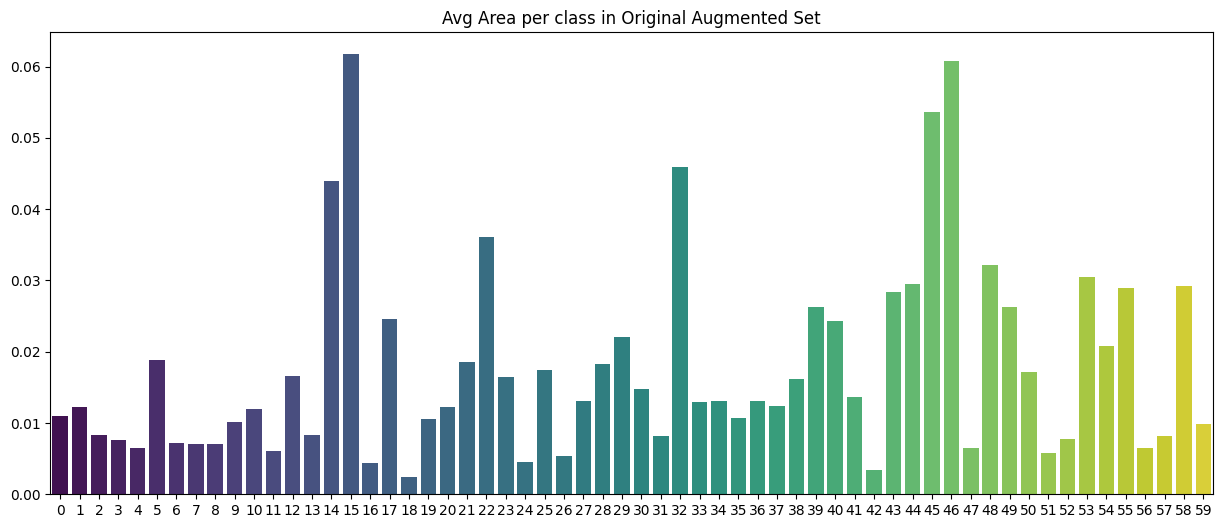

In [ ]:
plot_histogram((instance_count_per_class.keys(), avg_instance_area_per_class.values()), "Avg Area per class in Original Augmented Set")

In [ ]:
# merge Training + Augmented Sets
def merge_dicts_add_values(dict1, dict2, add_values=True):
    merged = defaultdict(int)  # Default value is 0 for missing keys
    for d in (dict1, dict2):  # Loop through both dictionaries
        for key, value in d.items():
            if add_values:
                merged[key] += value  # Add values if key exists, otherwise assign
            else:
              merged[key] = value
    return dict(merged)


In [ ]:
tr_instance_count_per_class = get_instance_count_per_class(train_path)
tr_avg_instance_area_per_class = get_avg_instance_area_per_class(train_path)

aug_instance_count_per_class = get_instance_count_per_class(aug_path)
aug_avg_instance_area_per_class = get_avg_instance_area_per_class(aug_path)

merged_train_aug_instance_count_per_class = merge_dicts_add_values(tr_instance_count_per_class, aug_instance_count_per_class)
merged_train_aug_avg_instance_area_per_class = merge_dicts_add_values(tr_avg_instance_area_per_class, aug_avg_instance_area_per_class, add_values=False)

<ipython-input-45-6c17ed8da948>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="viridis")


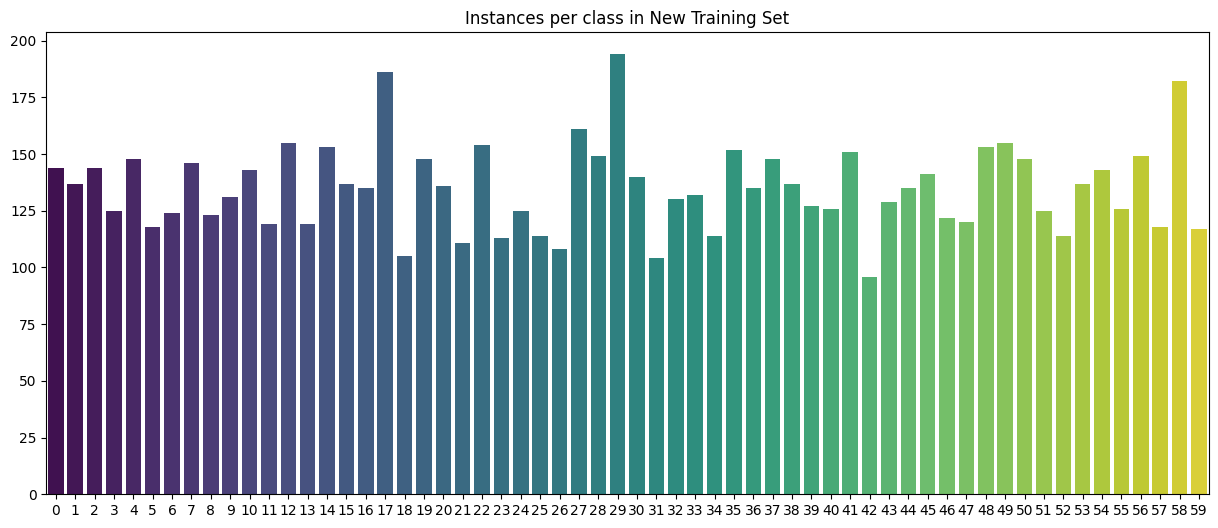

In [ ]:
plot_histogram((merged_train_aug_instance_count_per_class.keys(), merged_train_aug_instance_count_per_class.values()), "Instances per class in New Training Set")

<ipython-input-45-6c17ed8da948>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="viridis")


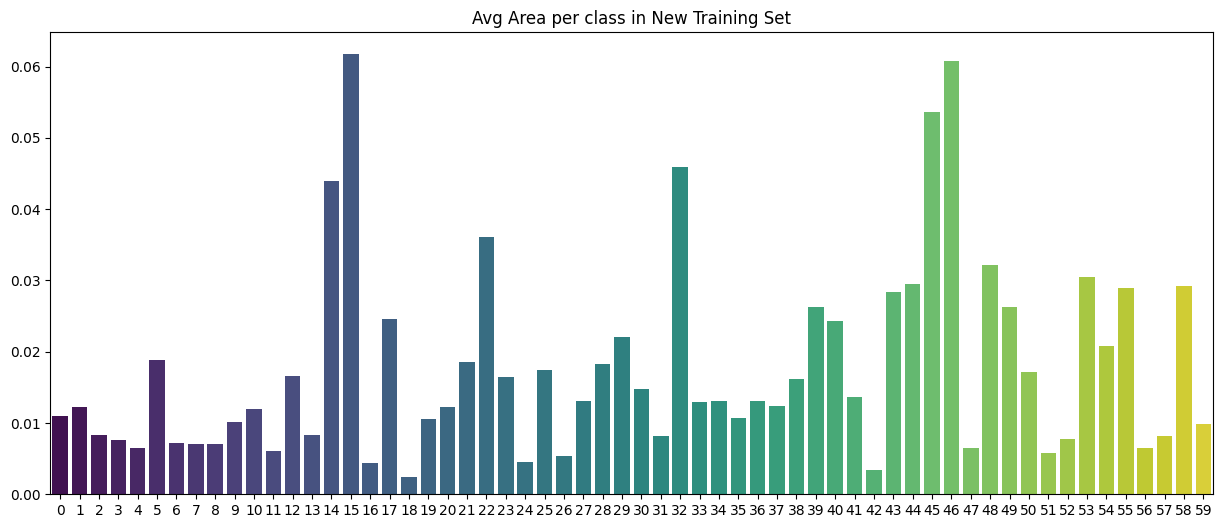

In [ ]:
plot_histogram((merged_train_aug_avg_instance_area_per_class.keys(), merged_train_aug_avg_instance_area_per_class.values()), "Avg Area per class in New Training Set")

<ipython-input-45-6c17ed8da948>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="viridis")


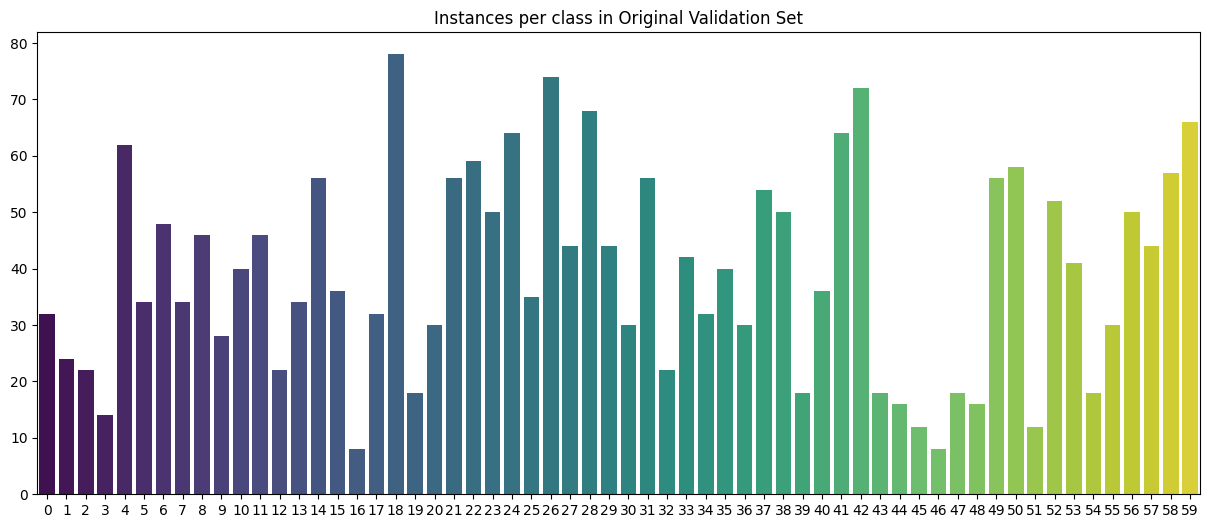

In [ ]:
instance_count_per_class = get_instance_count_per_class(val_path)
avg_instance_area_per_class = get_avg_instance_area_per_class(val_path)
plot_histogram((instance_count_per_class.keys(), instance_count_per_class.values()), "Instances per class in Original Validation Set")

<ipython-input-45-6c17ed8da948>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="viridis")


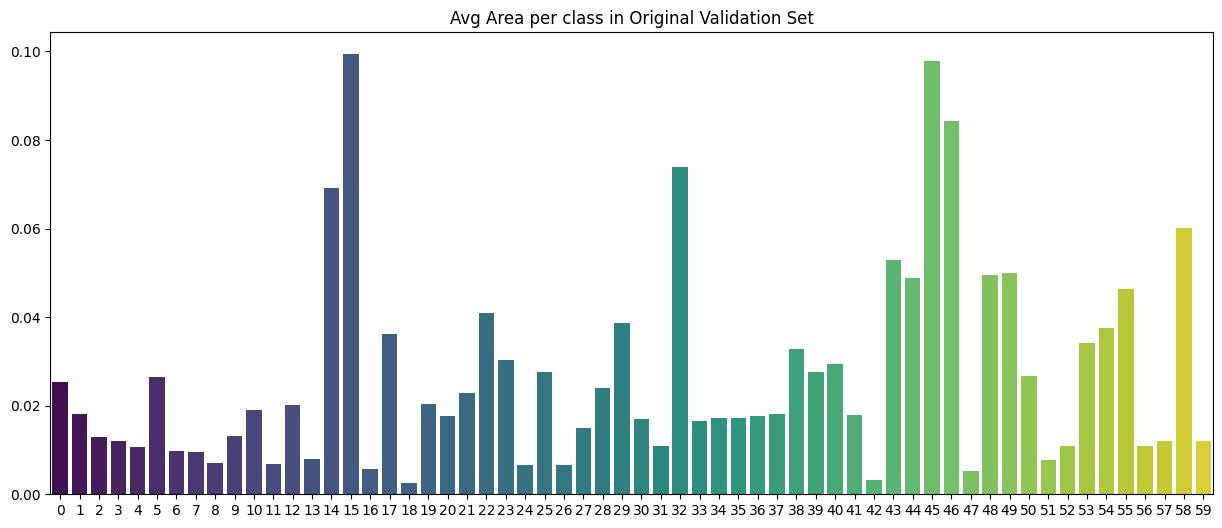

In [ ]:
plot_histogram((instance_count_per_class.keys(), avg_instance_area_per_class.values()), "Avg Area per class in Original Validation Set")

We notice that the instances in the validation set, has a little bit higher ares compared to the images in the training set. Which may cause some errors in segmentation during inference

## Plotting Sample images

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def get_class_color_dict(gloabal_metadata):

  classId_color = {}

  for class_ in gloabal_metadata["classes"]:
    classId_color[class_["id"]] = class_["color"]

  return classId_color

classId_colors = get_class_color_dict(metadata)

def hex_2_rgb(hex_color):

  hex = hex_color.lstrip("#")
  rgb = tuple(int(hex[i:i+2], 16) for i in (0, 2, 4))

  return rgb


def plot_image_instance_mask(image_path, ann_path):

  image = cv2.imread(image_path)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

  with open(ann_path, "r") as f:
    ann = json.load(f)

  fig, ax = plt.subplots(1,1)

  for instance in ann["objects"]:

    hex_color = classId_colors[instance["classId"]]
    # print(h_color)
    points = instance["points"]["exterior"]
    polygon = Polygon([*points], color=hex_color, alpha=0.9)

    ax.add_patch(polygon)


  ax.imshow(image, alpha=0.8)
  plt.show()




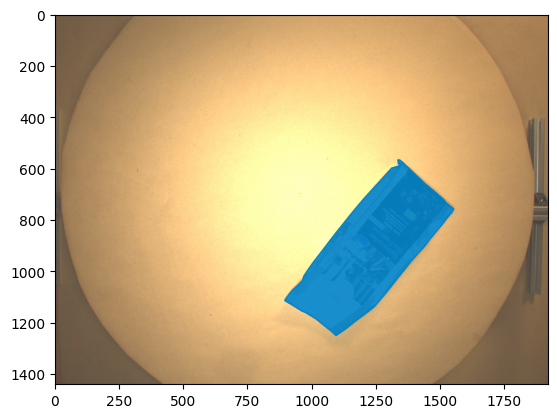

In [ ]:
image_path = "./dataset/training/img/D2S_001218_D2S_training.jpg"
ann_path = "./dataset/training/ann/D2S_001218_D2S_training.jpg.json"
plot_image_instance_mask(image_path, ann_path)

In [ ]:
1920/3, 1440/3

(640.0, 480.0)